In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(os.getenv('HOME')+'/aiffel/insurance_fraud/data/final_v2.csv')

In [3]:
df.head()

,test/train/unlabeled,isfraud,car_model_1,car_model_2,car_model_3,car_model_4,car_model_5,sharing_type_0,sharing_type_1,age_group_1,...,acc_hour_6,oai_prsn_cnt_missing,oai_prsn_cnt_0,oai_prsn_cnt_1,oai_prsn_cnt_2,oai_prsn_cnt_3,oai_prsn_cnt_4,oai_prsn_cnt_5,network_feature_involved_cnt,h3_feature_top3_share
0,1,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,5,0.413587
1,1,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,4,0.748059
2,1,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,5,0.738435
3,1,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,3,0.587487
4,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,6,0.683564


In [4]:
df['test/train/unlabeled'].unique()

array([1, 2, 3])

In [5]:
print(len(df[df['test/train/unlabeled'] == 1]))
print(len(df[df['test/train/unlabeled'] == 2]))
print(len(df[df['test/train/unlabeled'] == 3]))

149
100
351


In [6]:
df['isfraud'].unique()

array([ 1,  0, -1])

In [7]:
print(len(df[df['isfraud'] == 0]))
print(len(df[df['isfraud'] == 1]))
print(len(df[df['isfraud'] == -1]))

191
58
351


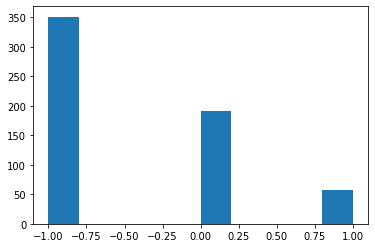

In [8]:
plt.hist(df['isfraud'])
plt.show()

* 'test/train/unlabeld'의 3과 'isfraud' -1의 갯수가 같기 때문에 3을 추정해야함

In [9]:
features = df.columns.drop(['test/train/unlabeled', 'isfraud'])
label = ['isfraud']

In [10]:
# labled 데이터 변수 지정
X_train_labeled = df[df['test/train/unlabeled'] == 2][features]
Y_train_labeled = df[df['test/train/unlabeled'] == 2][label]

X_test_labeled = df[df['test/train/unlabeled'] == 1][features]
Y_test_labeled = df[df['test/train/unlabeled'] == 1][label]

###  Baseline모델

In [11]:
clf1 = LogisticRegression(random_state=0).fit(X_train_labeled, Y_train_labeled.values.ravel())

y = Y_test_labeled
y_pred = clf1.predict(X_test_labeled)

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       124
           1       0.32      0.68      0.44        25

    accuracy                           0.70       149
   macro avg       0.62      0.69      0.62       149
weighted avg       0.82      0.70      0.74       149



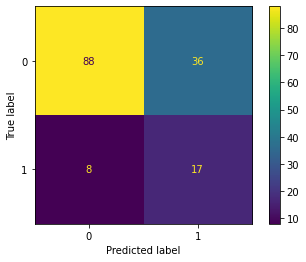

In [12]:
print(classification_report(y, y_pred))
ConfusionMatrixDisplay.from_estimator(clf1, X_test_labeled, Y_test_labeled)
plt.show()

* 보험사기라는 것을 뜻하는 1의 f1-score가 0.44를 기록함

### 프로젝트

In [13]:
# unlabeled 데이터 변수지정
X_train_unlabeled = df[df['test/train/unlabeled'] == 3]
X_train_unlabeled = X_train_unlabeled.drop(['test/train/unlabeled'], axis = 1)

In [14]:
len(X_train_unlabeled)

351

unlabeled 샘플갯수 : (35, 51), 총 훈련데이터 갯수 (135, 50)
F1 Score(neighbors : 1, ratios : 0.1): 0.23
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       124
           1       0.21      0.24      0.23        25

    accuracy                           0.72       149
   macro avg       0.53      0.53      0.53       149
weighted avg       0.74      0.72      0.73       149



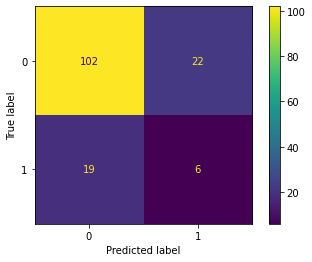

unlabeled 샘플갯수 : (105, 51), 총 훈련데이터 갯수 (205, 50)
F1 Score(neighbors : 1, ratios : 0.3): 0.22
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       124
           1       0.24      0.20      0.22        25

    accuracy                           0.76       149
   macro avg       0.54      0.54      0.54       149
weighted avg       0.74      0.76      0.75       149



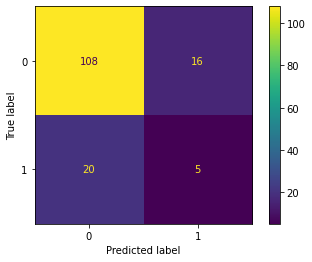

unlabeled 샘플갯수 : (176, 51), 총 훈련데이터 갯수 (276, 50)
F1 Score(neighbors : 1, ratios : 0.5): 0.24
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       124
           1       0.31      0.20      0.24        25

    accuracy                           0.79       149
   macro avg       0.58      0.56      0.56       149
weighted avg       0.76      0.79      0.77       149



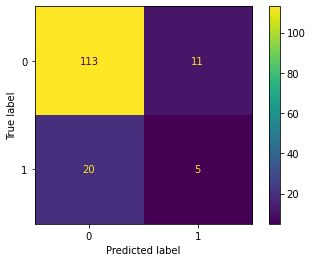

unlabeled 샘플갯수 : (35, 51), 총 훈련데이터 갯수 (135, 50)
F1 Score(neighbors : 3, ratios : 0.1): 0.37
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       124
           1       0.31      0.44      0.37        25

    accuracy                           0.74       149
   macro avg       0.60      0.62      0.60       149
weighted avg       0.78      0.74      0.76       149



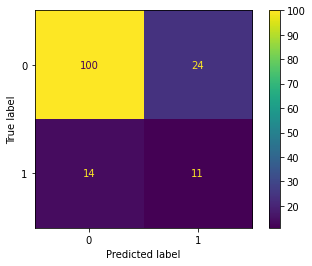

unlabeled 샘플갯수 : (105, 51), 총 훈련데이터 갯수 (205, 50)
F1 Score(neighbors : 3, ratios : 0.3): 0.23
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       124
           1       0.19      0.28      0.23        25

    accuracy                           0.68       149
   macro avg       0.52      0.52      0.52       149
weighted avg       0.73      0.68      0.71       149



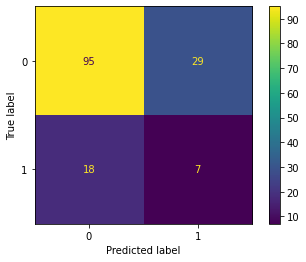

unlabeled 샘플갯수 : (176, 51), 총 훈련데이터 갯수 (276, 50)
F1 Score(neighbors : 3, ratios : 0.5): 0.24
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       124
           1       0.19      0.32      0.24        25

    accuracy                           0.65       149
   macro avg       0.51      0.52      0.50       149
weighted avg       0.73      0.65      0.68       149



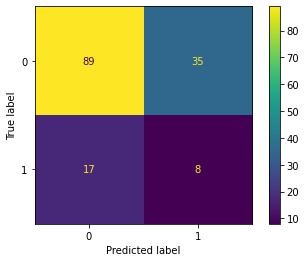

unlabeled 샘플갯수 : (35, 51), 총 훈련데이터 갯수 (135, 50)
F1 Score(neighbors : 5, ratios : 0.1): 0.36
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       124
           1       0.36      0.36      0.36        25

    accuracy                           0.79       149
   macro avg       0.62      0.62      0.62       149
weighted avg       0.79      0.79      0.79       149



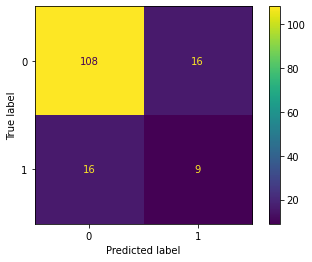

unlabeled 샘플갯수 : (105, 51), 총 훈련데이터 갯수 (205, 50)
F1 Score(neighbors : 5, ratios : 0.3): 0.32
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       124
           1       0.27      0.40      0.32        25

    accuracy                           0.72       149
   macro avg       0.57      0.59      0.57       149
weighted avg       0.77      0.72      0.74       149



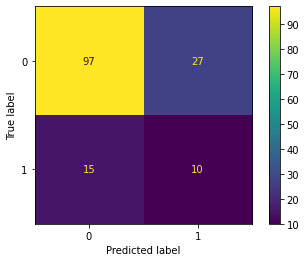

unlabeled 샘플갯수 : (176, 51), 총 훈련데이터 갯수 (276, 50)
F1 Score(neighbors : 5, ratios : 0.5): 0.28
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       124
           1       0.24      0.32      0.28        25

    accuracy                           0.72       149
   macro avg       0.55      0.56      0.55       149
weighted avg       0.75      0.72      0.73       149



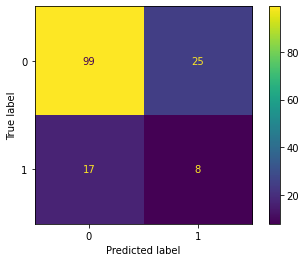

In [15]:
k_values = [1, 3, 5] # k값
sample_ratios = [0.1, 0.3, 0.5] # 샘플링 비율

for k in k_values:
    for s in sample_ratios:
        model = LabelSpreading(kernel='knn', n_neighbors=k) # 모델 파라미터 지정
        X_train_un =  X_train_unlabeled.sample(frac=s, random_state=23) # frac에 따라 비율 조정 샘플링
        X_train = pd.concat([X_train_labeled, X_train_un])[features] # concat으로 label데이터와 unlabel데이터를 합침
        Y_train = pd.concat([Y_train_labeled, X_train_un])[label]
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test_labeled)
        f1 = f1_score(Y_test_labeled, y_pred.ravel())
        print(f'unlabeled 샘플갯수 : {X_train_un.shape}, 총 훈련데이터 갯수 {X_train.shape}')
        print(f'F1 Score(neighbors : {k}, ratios : {s}): {f1:.2f}')
        print(classification_report(Y_test_labeled, y_pred))
        ConfusionMatrixDisplay.from_estimator(model, X_test_labeled, Y_test_labeled)
        plt.show()